Add data

In [61]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [62]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

In [63]:
cust_df = pd.read_excel('/content/Mine_Dataset.xls')

In [64]:
cust_df

,Voltage,High,Soil type,Mine Type
0,0.338157,0.000000,0.0,1
1,0.320241,0.181818,0.0,1
2,0.287009,0.272727,0.0,1
3,0.256284,0.454545,0.0,1
4,0.262840,0.545455,0.0,1
...,...,...,...,...
333,0.323262,0.909091,0.4,5
334,0.444108,0.181818,1.0,5
335,0.353474,0.454545,1.0,5
336,0.362537,0.727273,1.0,5


In [65]:
X = cust_df[['Voltage', 'Soil type']]

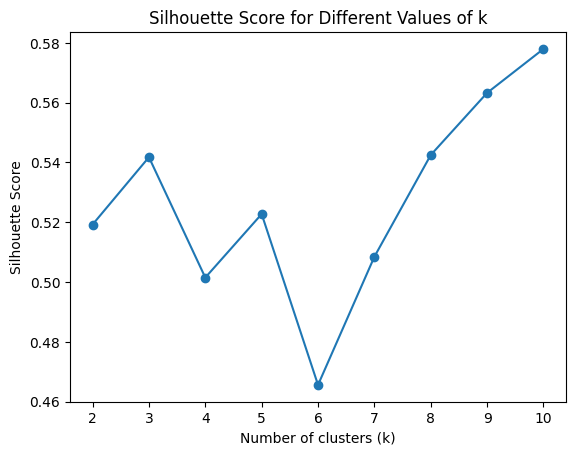

In [66]:
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Values of k')
plt.show()


In [67]:
best_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Adding 2 to account for starting from k=2
kmeans = KMeans(n_clusters=best_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)



KMeans(n_clusters=10, n_init=10, random_state=0)

In [68]:
cust_df['Cluster'] = kmeans.labels_

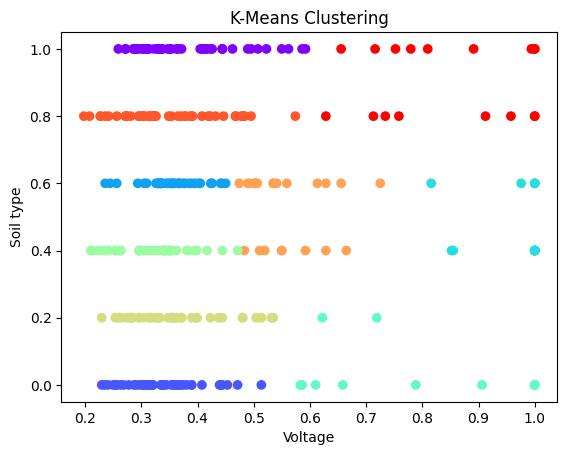

In [69]:
plt.scatter(X['Voltage'], X['Soil type'], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('Voltage')
plt.ylabel('Soil type')
plt.title('K-Means Clustering')
plt.show()